In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
df = pd.read_csv("train.csv")

In [5]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
#Gives the information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
#Datatype counts in the datset
df.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64

In [8]:
#Shows the total number of rows and columns present in the dataset
df.shape

(550068, 12)

In [9]:
#Shows the name of columns present in dataset
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [10]:
#Shows the range of index
df.index

RangeIndex(start=0, stop=550068, step=1)

RENAMING THE COLUMNS
 CHANGING THE NAMES OF THE COLUMNS FOR BETTER UNDERSTANDING

In [11]:
df.rename(columns = {'User_ID' : 'UserID' , 'Product_ID' : 'ProductID' , 'Product_Category_1' : 'product1' , 'Product_Category_2' : 'product2' , 'Product_Category_3' : 'product3' , 'Marital_Status' : 'maritalstats' ,'Stay_In_Current_City_Years' : 'city'}, inplace = True)
df.head()

,UserID,ProductID,Gender,Age,Occupation,City_Category,city,maritalstats,product1,product2,product3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


DROPPING OUT UNNECESSARY COLUMNS

 Here we are going to drop ProductID column so the visualization and cleaning become easy

In [12]:
df.drop(['ProductID'] , inplace = True , axis = 'columns')
df.head()

,UserID,Gender,Age,Occupation,City_Category,city,maritalstats,product1,product2,product3,Purchase
0,1000001,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   UserID         550068 non-null  int64  
 1   Gender         550068 non-null  object 
 2   Age            550068 non-null  object 
 3   Occupation     550068 non-null  int64  
 4   City_Category  550068 non-null  object 
 5   city           550068 non-null  object 
 6   maritalstats   550068 non-null  int64  
 7   product1       550068 non-null  int64  
 8   product2       376430 non-null  float64
 9   product3       166821 non-null  float64
 10  Purchase       550068 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 46.2+ MB


NULL VALUES IN DATASET

In [14]:
#Finding out null values in each columns
df.isnull().sum()

UserID                0
Gender                0
Age                   0
Occupation            0
City_Category         0
city                  0
maritalstats          0
product1              0
product2         173638
product3         383247
Purchase              0
dtype: int64

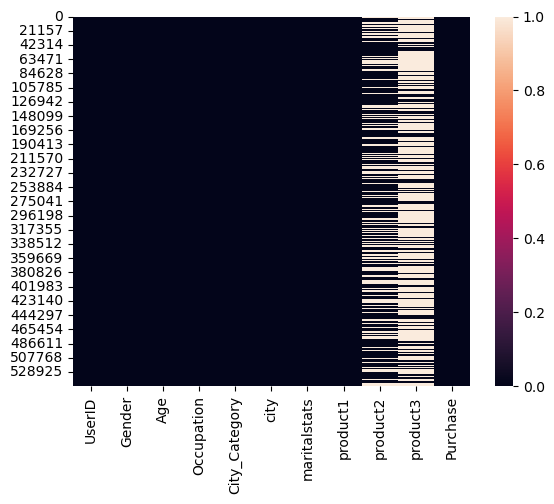

In [15]:
sns.heatmap(df.isnull())
plt.show()

Heatmap shows that null values are present in columns
1. Product_Category_2
2. Product_Category_3

In [16]:
#Finding out total null values in dataset
df.isnull().sum().sum()

556885

In [17]:
#COLUMN "PRODUCT2"
df['product2'].value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: product2, dtype: int64

# HANDLING MISSING VALUES

HANDLING MISSING VALUES IN PRODUCT2 COLUMN

In [18]:
df.product2.isnull().sum()

173638

In [19]:
df.shape

(550068, 11)

In [20]:
float(100.0*173638/550068)

31.566642669633573

In [21]:
#REMOVING THE PERCENTAGE OF NULL DATA IN PRODUCT2
(df['product2'].isnull().sum() / len(df)) * 100

31.56664266963357

DROP RECORDS WITH PRODUCT2 MISSING

In [22]:
df1= df[~df.product2.isnull()].copy(0)
df1.shape

(376430, 11)

In [23]:
df1.product2.isnull().sum()

0

HANDLING MISSING VALUES IN PRODUCT3 COLUMN

In [24]:
df.product3.isnull().sum()

383247

In [25]:
df.shape

(550068, 11)

In [26]:
float(100.0*383247/550068)

69.67265865311198

In [27]:
df1= df[~df.product3.isnull()].copy(0)
df1.shape

(166821, 11)

In [28]:
df1.product3.isnull().sum()

0

LOOKING FOR OUTLIERS

In product1

In [29]:
df.product1.describe()

count    550068.000000
mean          5.404270
std           3.936211
min           1.000000
25%           1.000000
50%           5.000000
75%           8.000000
max          20.000000
Name: product1, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

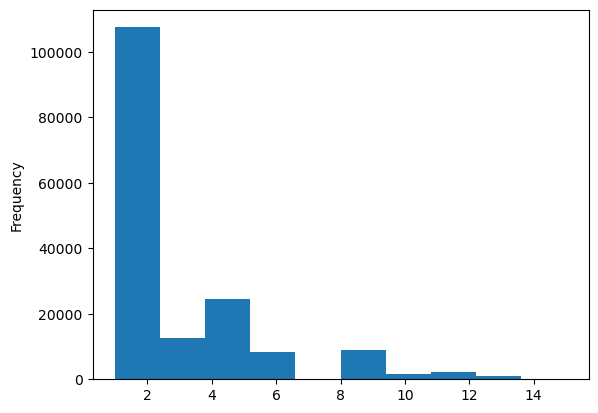

In [30]:
df1.product1.plot.hist()
plt.show

<AxesSubplot:xlabel='product1'>

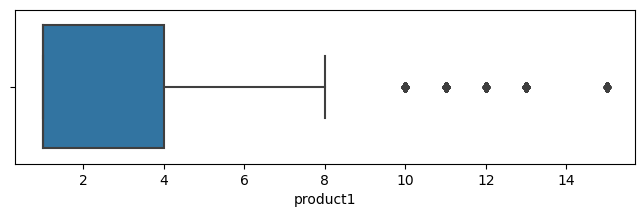

In [31]:
plt.figure(figsize=[8,2])
sns.boxplot(df1.product1)


In [32]:
df1.product1.quantile([.5,.75,.9,.95,.99])

0.50     1.0
0.75     4.0
0.90     6.0
0.95     8.0
0.99    11.0
Name: product1, dtype: float64

In [33]:
df1[df1.product1>14].describe()

,UserID,Occupation,maritalstats,product1,product2,product3,Purchase
count,1.510000e+02,151.000000,151.000000,151.0,151.0,151.0,151.000000
mean,1.003169e+06,8.688742,0.443709,15.0,16.0,17.0,15037.178808
std,1.712260e+03,6.499421,0.498474,0.0,0.0,0.0,4517.423424
min,1.000017e+06,0.000000,0.000000,15.0,16.0,17.0,4262.000000
25%,1.001760e+06,2.000000,0.000000,15.0,16.0,17.0,12686.000000
50%,1.003178e+06,7.000000,0.000000,15.0,16.0,17.0,16635.000000
75%,1.004526e+06,15.000000,1.000000,15.0,16.0,17.0,17291.000000
max,1.006037e+06,20.000000,1.000000,15.0,16.0,17.0,21525.000000


CHECKING FOR DUPLICATES

In [34]:
df.duplicated().sum()

2543

CLEANING INDIVIDUAL COLUMNS

COLUMN "CITY"

In [35]:
df['city'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [36]:
def cities(value):
    if '+' in value:
        value=value.replace('+','')
        return int(value)
    else:
        return int(value)

df1['city']=df1['city'].apply(cities)

In [37]:
df1['city'].unique()

array([2, 1, 4, 0, 3], dtype=int64)

COLUMN "USERID"

In [38]:
df['UserID'].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529],
      dtype=int64)

COlUMN "GENDER"

In [39]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

COLUMN "AGE"

In [40]:
df1['Age'].unique()

array(['0-17', '46-50', '26-35', '51-55', '36-45', '18-25', '55+'],
      dtype=object)

In [41]:
def ages(value):
    if '0-17' in value:
        value=value.replace('0-17','child')
        return str(value)
    elif '26-35'in value:
        value=value.replace('26-35','adult')
        return str(value)
    elif '18-25'in value:
        value=value.replace('18-25','teenage')
        return str(value)
    elif '36-45'in value:
        value=value.replace('36-45','adult')
        return str(value)
    elif '46-50'in value:
        value=value.replace('46-50','adult')
        return str(value)
    elif '51-55'in value:
        value=value.replace('51-55','old')
        return str(value)
    else:
        value=value.replace('55+','old')
        return str(value)
df1['Age']=df1['Age'].apply(ages)

Over here we have replaced the age groups according to the categories.

We have replaced numerical data into categorical data.

The types of categories are: child,adult,teenage and old.

 1.0-17 - child
 
 2.18-25 - teenage
 
 3.26-35 - adult
 
 4.36-45 - adult
 
 5.46-50 - adult
 
 6.51-55 - old
 
 7.55+ - old

In [42]:
df1.Age.unique()

array(['child', 'adult', 'old', 'teenage'], dtype=object)

COLUMN "OCCUPATION

In [43]:
df1.Occupation.unique()

array([10,  7, 20,  9,  1, 12, 17,  0,  3, 15,  4, 11,  8, 16, 19,  2, 14,
       13,  6,  5, 18], dtype=int64)

COLUMN "CITY CATEGORY" 

In [44]:
df1.City_Category.unique()

array(['A', 'B', 'C'], dtype=object)

COLUMN "MARITALSTATS"

In [45]:
df['maritalstats'].unique()

array([0, 1], dtype=int64)

There's nothing to change in this column.
  1. Here married status is 1
  2. single status is 0

COLUMN "PRODUCT1"

In [46]:
df1.product1.unique()

array([ 1,  5,  2,  6,  3,  4,  8, 12, 11, 10, 15, 13], dtype=int64)

# AFTER CLEANING CHECKING THE DATA

In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166821 entries, 1 to 545914
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   UserID         166821 non-null  int64  
 1   Gender         166821 non-null  object 
 2   Age            166821 non-null  object 
 3   Occupation     166821 non-null  int64  
 4   City_Category  166821 non-null  object 
 5   city           166821 non-null  int64  
 6   maritalstats   166821 non-null  int64  
 7   product1       166821 non-null  int64  
 8   product2       166821 non-null  float64
 9   product3       166821 non-null  float64
 10  Purchase       166821 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 15.3+ MB


In [48]:
df1.isnull().sum()

UserID           0
Gender           0
Age              0
Occupation       0
City_Category    0
city             0
maritalstats     0
product1         0
product2         0
product3         0
Purchase         0
dtype: int64

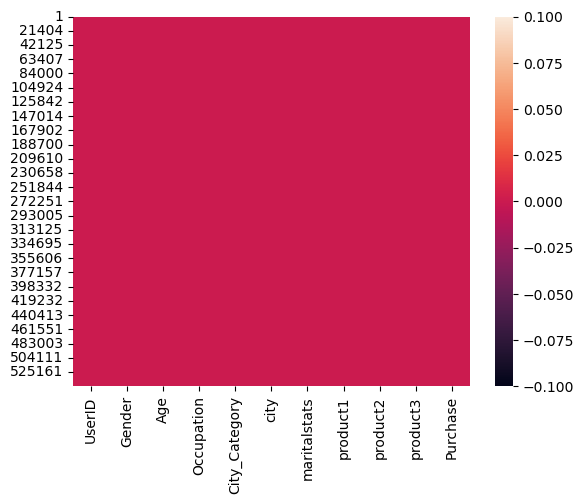

In [49]:
sns.heatmap(df1.isnull())
plt.show()

The heat map shows that there is no null value present in data set.

# STATISTICAL INTUITIONS

STANDARD DEVIATION OF WHOLE DATA

In [50]:
df.std

<bound method NDFrame._add_numeric_operations.<locals>.std of          UserID Gender    Age  Occupation City_Category city  maritalstats  \
0       1000001      F   0-17          10             A    2             0   
1       1000001      F   0-17          10             A    2             0   
2       1000001      F   0-17          10             A    2             0   
3       1000001      F   0-17          10             A    2             0   
4       1000002      M    55+          16             C   4+             0   
...         ...    ...    ...         ...           ...  ...           ...   
550063  1006033      M  51-55          13             B    1             1   
550064  1006035      F  26-35           1             C    3             0   
550065  1006036      F  26-35          15             B   4+             1   
550066  1006038      F    55+           1             C    2             0   
550067  1006039      F  46-50           0             B   4+             1   

 

MEAN OF 'PURCHASE' COLUMN

In [51]:
df.Purchase.mean()

9263.968712959126

VARIANCE OF 'OCCUPATION' COLUMN

In [52]:
df.Occupation.var()

42.54509983310191

MEDIAN OF 'PURCHASE' COLUMN

In [53]:
df.Purchase.median()

8047.0

PERCENTILE DIVISION OF WHOLE DATA

In [54]:
df.quantile([0,.25,.5,.75,.9,.95,.99,1])

,UserID,Occupation,maritalstats,product1,product2,product3,Purchase
0.00,1000001.0,0.0,0.0,1.0,2.0,3.0,12.0
0.25,1001516.0,2.0,0.0,1.0,5.0,9.0,5823.0
0.50,1003077.0,7.0,0.0,5.0,9.0,14.0,8047.0
0.75,1004478.0,14.0,1.0,8.0,15.0,16.0,12054.0
0.90,1005446.0,17.0,1.0,11.0,16.0,17.0,16317.0
0.95,1005747.0,20.0,1.0,13.0,16.0,17.0,19336.0
0.99,1005980.0,20.0,1.0,18.0,17.0,18.0,20665.0
1.00,1006040.0,20.0,1.0,20.0,18.0,18.0,23961.0


# UNIVARIATE ANALYSIS

In [55]:
df1.dtypes

UserID             int64
Gender            object
Age               object
Occupation         int64
City_Category     object
city               int64
maritalstats       int64
product1           int64
product2         float64
product3         float64
Purchase           int64
dtype: object

# UNIVARIATE ANALYSIS - CATEGORICAL UNORDERED

CITY

In [56]:
df1.city.value_counts()

1    58287
2    31515
3    29268
4    25362
0    22389
Name: city, dtype: int64

In [57]:
df1.city.value_counts(normalize=True)

1    0.349398
2    0.188915
3    0.175446
4    0.152031
0    0.134210
Name: city, dtype: float64

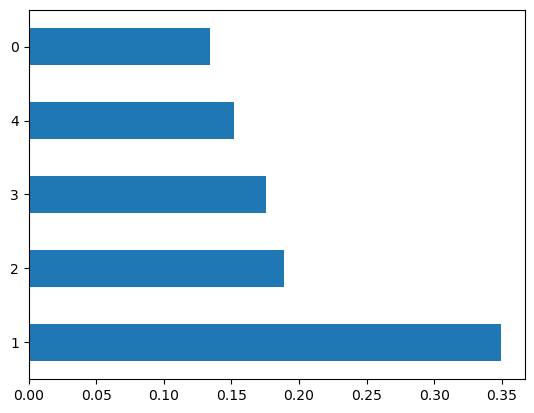

In [58]:
##HORIZONTAL BAR GRAPH
df1.city.value_counts(normalize=True).plot.barh()
plt.show()

PURCHASE

In [59]:
df1.Purchase.value_counts(normalize=True)

15879    0.000414
15756    0.000378
15206    0.000372
15891    0.000366
15616    0.000354
           ...   
23628    0.000006
21446    0.000006
23796    0.000006
8471     0.000006
18755    0.000006
Name: Purchase, Length: 13876, dtype: float64

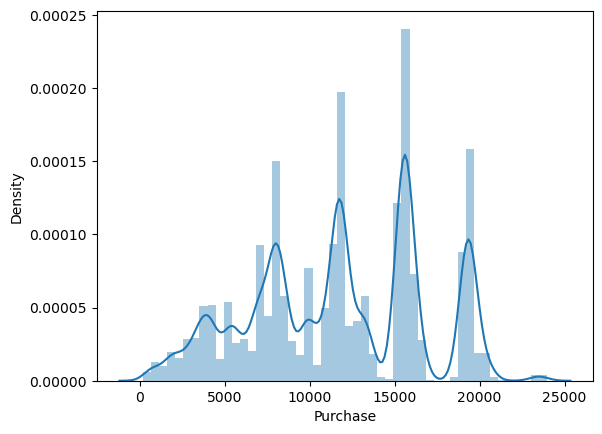

In [60]:
sns.distplot(df1.Purchase)
plt.show()

PRODUCT1

<AxesSubplot:xlabel='product1'>

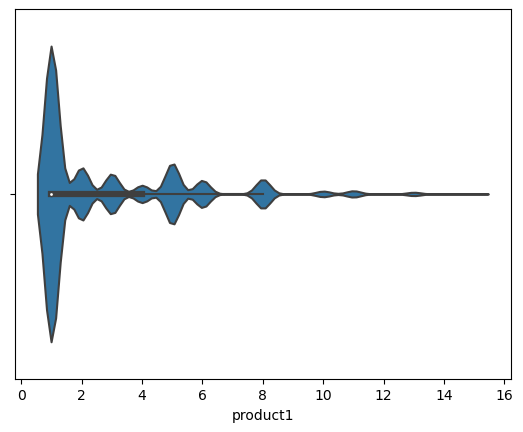

In [61]:
##VIOLIN PLOT - box and kernel
sns.violinplot(x=df1.product1)

# UNIVARIATE ANALYSIS - CATEGORICAL ORDERED

AGE

In [62]:
df1.Age.value_counts(normalize=True)

adult      0.680975
teenage    0.187722
old        0.102091
child      0.029211
Name: Age, dtype: float64

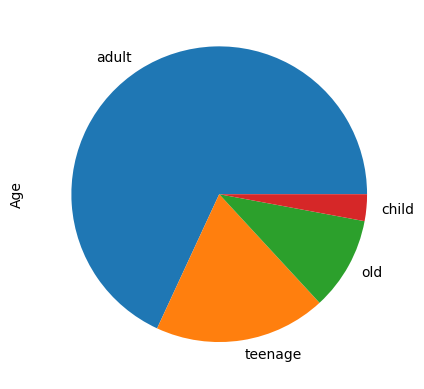

In [63]:
##PIE CHART
df1.Age.value_counts(normalize=True).plot.pie()
plt.show()

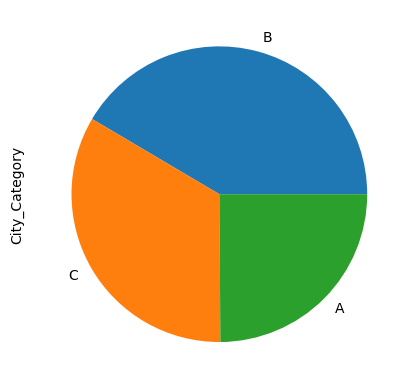

In [113]:
##PIE CHART
df1.City_Category.value_counts(normalize=True).plot.pie()
plt.show()

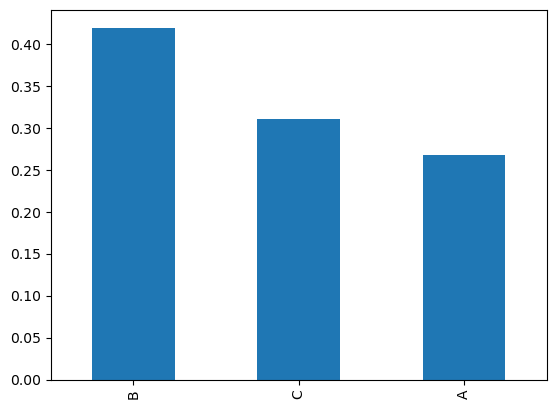

In [64]:
df.City_Category.value_counts(normalize=True).plot.bar()
plt.show()

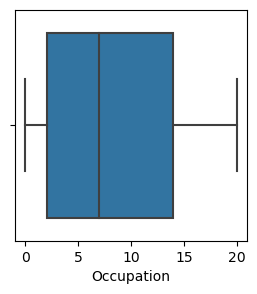

In [70]:
plt.figure(figsize=(3,3))
sns.boxplot(df1.Occupation)
plt.show()

GENDER COUNTPLOT

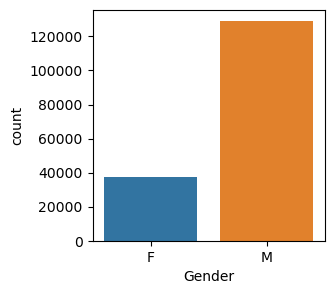

In [65]:
plt.figure(figsize=(3,3))
sns.countplot(df1.Gender)
plt.show()

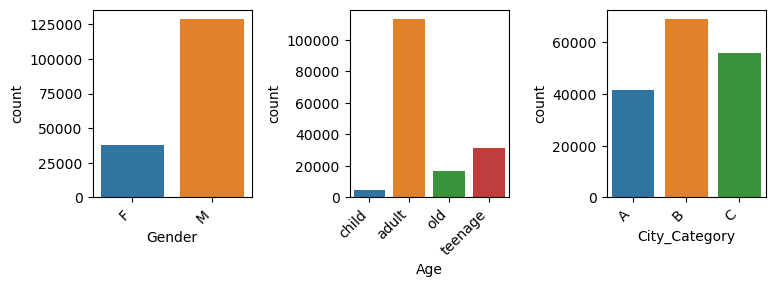

In [66]:
# 1. COUNT PLOT
cols = 5
rows = 2
fig = plt.figure(figsize= (13,5))
all_categs = df1.select_dtypes(include='object')
cat_cols = all_categs.columns[all_categs.nunique() < 10]
for i, col in enumerate(cat_cols):
    
    ax=fig.add_subplot(rows, cols, i+1)
    
    sns.countplot(x=df1[col], ax=ax)
    
    plt.xticks(rotation=45, ha='right')
    
fig.tight_layout()  
plt.show()

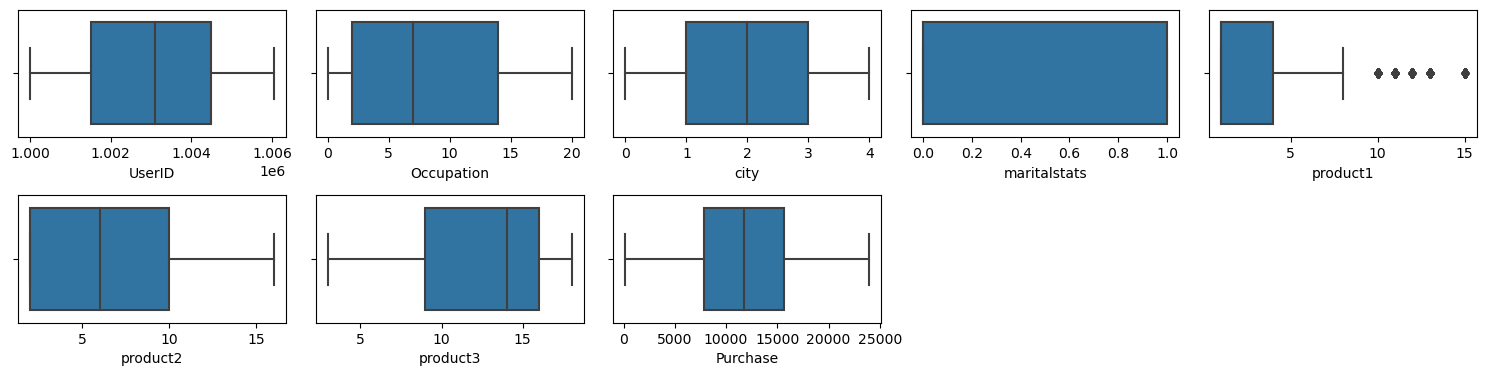

In [67]:
cols = 5
rows = 5
num_cols = df1.select_dtypes(exclude='object').columns
fig = plt.figure(figsize= (15,9))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot( rows, cols, i+1)
    
    sns.boxplot(x=df1[col], ax=ax)
    
fig.tight_layout()  
plt.show()

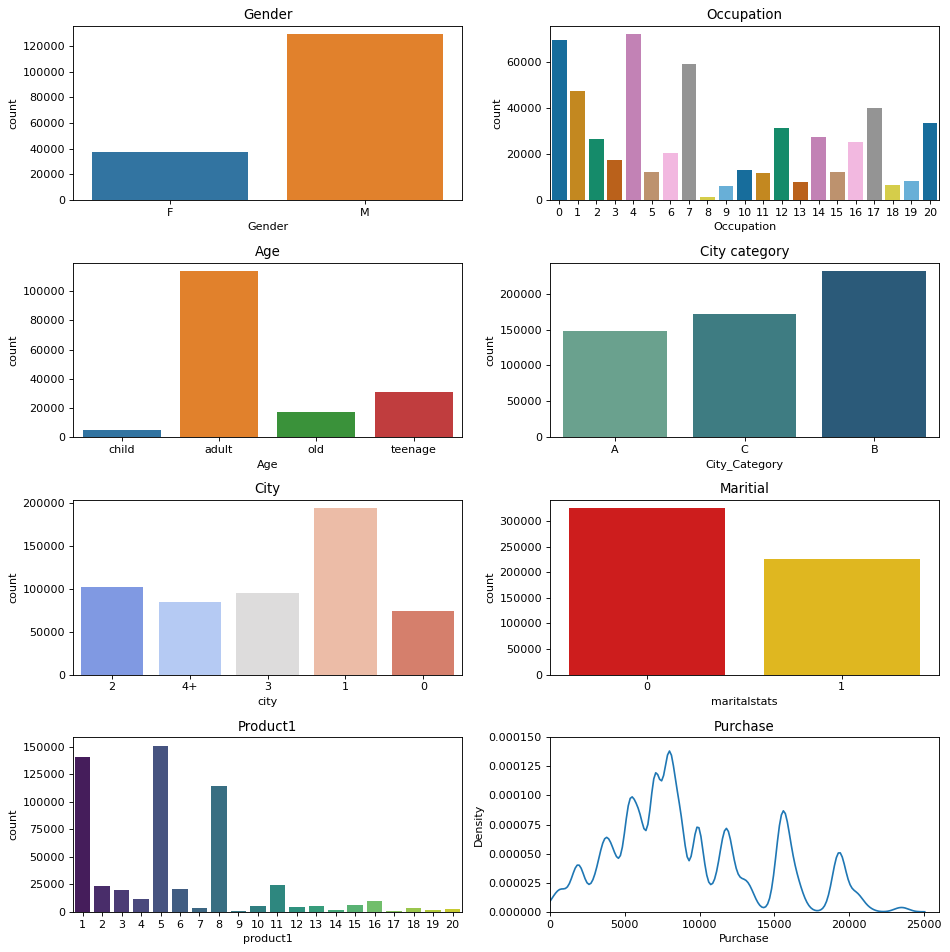

In [104]:
# Visualizing individual column 
plt.figure(figsize=(12,12),dpi=80)
plt.subplot(4,2,1)
plt.title('Gender')
sns.countplot(df1.Gender)

plt.subplot(4,2,3)
plt.title('Age')
sns.countplot(df1.Age)

plt.subplot(4,2,2)
plt.title('Occupation')
sns.countplot(df['Occupation'],palette='colorblind')

plt.subplot(4,2,4)
plt.title('City category')
sns.countplot(df['City_Category'],palette='crest')

plt.subplot(4,2,5)
plt.title('City')
sns.countplot(df['city'],palette='coolwarm')

plt.subplot(4,2,6)
plt.title('Maritial')
sns.countplot(df['maritalstats'],palette='hot')

ax=plt.subplot(4,2,8)
plt.title('Purchase')
ax.set_ylim(0,0.00015)
ax.set_xlim(0,26000)
sns.kdeplot(df['Purchase'])

plt.subplot(4,2,7)
plt.title('Product1')
sns.countplot(df['product1'],palette='viridis')

plt.tight_layout()
plt.show()

Gender:-

The graph shows that count of male is more than female.

Male count=4000

Female count=1500

Age:-


The graph shows that pepople visiting the store are maximum adults.

Adult age ranges from 26-50

Where as least visited are children.

Marital:-

People visting the store are married and has higher count as compared to singles.

Married count = 3,00,000

Single count=2,00,000

Purchase:-

Purchase rate is higher between 5000 - 10,000

Purchase rate goes upto range 25,0000

City category:-

People visiting the store maximum belong to city category B.

Least visiting people visiting the store belong to category A.

City:-

Maximum people visiting the store belong to 1.

Least visited is city 0.

By this we can conclude that the store is located in city 1.

# BIVARIATE ANALYSIS

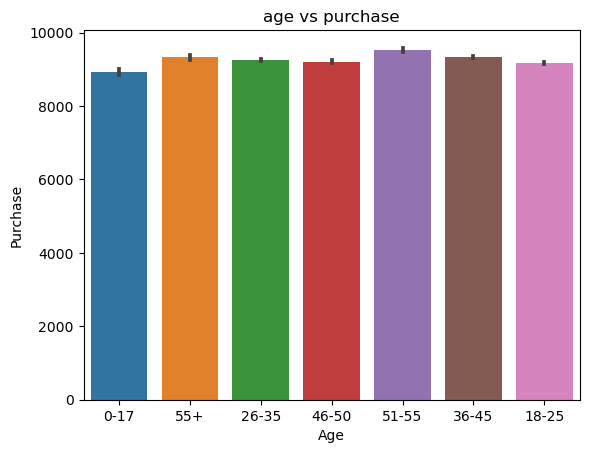

In [72]:
# Age vs purshase
plt.title('age vs purchase')
sns.barplot(df.Age, df.Purchase)
plt.show()

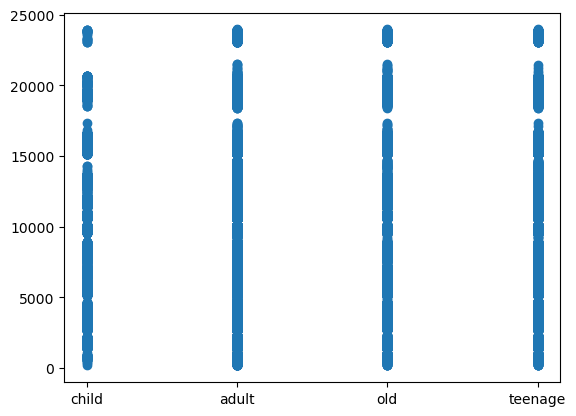

In [88]:
plt.scatter(df1.Age ,df1.Purchase)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

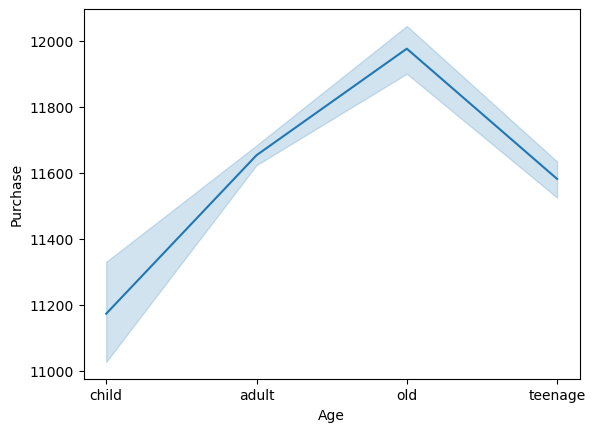

In [94]:
##LINE PLOT AGE VS PURCHASE
sns.lineplot(df1.Age , df1.Purchase)


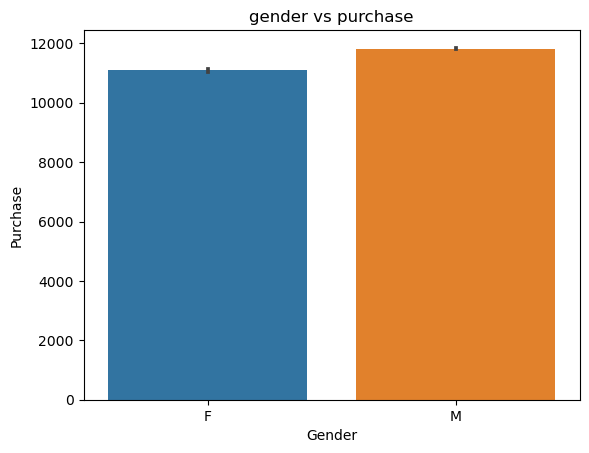

In [73]:
##GENDER VS PURCHASE
plt.title('gender vs purchase')
sns.barplot(df1.Gender, df1.Purchase)
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

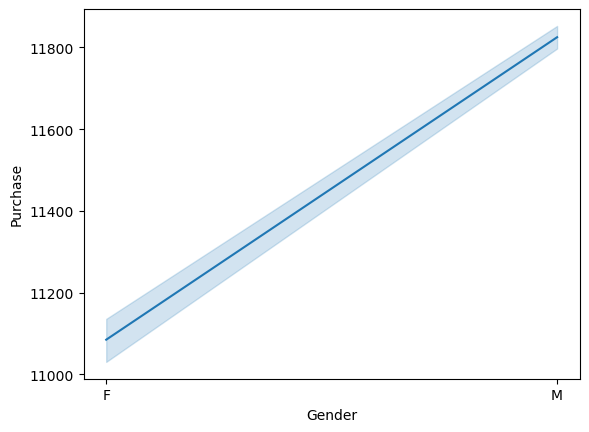

In [93]:
# Line Plot GENDER VS PURCHASE
sns.lineplot(df1.Gender , df1.Purchase)


<AxesSubplot:>

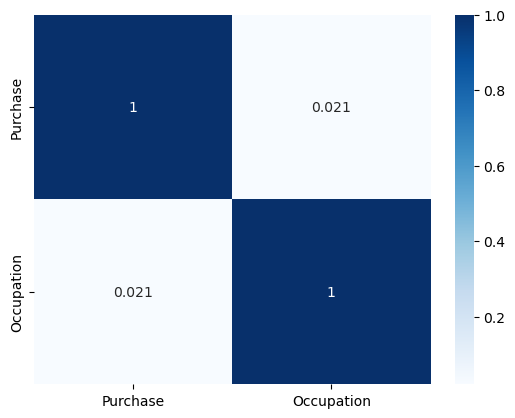

In [83]:
# Correlation Matrix
sns.heatmap(df[["Purchase","Occupation"]].corr(), annot=True, cmap="Blues")

<AxesSubplot:xlabel='Purchase', ylabel='product1'>

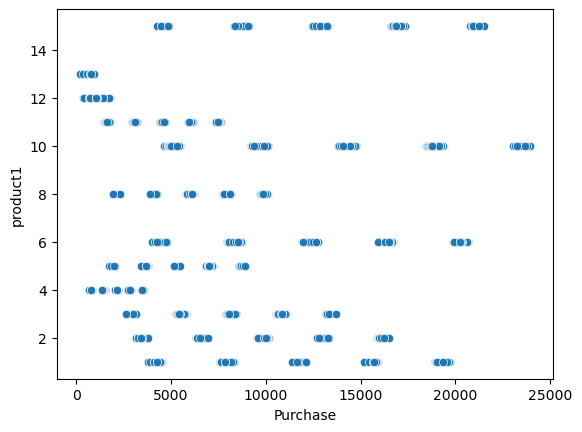

In [99]:
#SCATTER PLOT PURCHASE VS PRODUCT1
sns.scatterplot(df1.Purchase , df1.product1)

<AxesSubplot:xlabel='Purchase', ylabel='product2'>

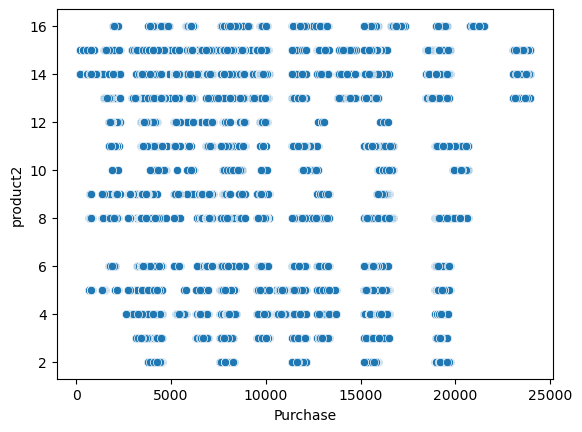

In [100]:
#SCATTER PLOT PURCHASE VS PRODUCT2
sns.scatterplot(df1.Purchase , df1.product2)

<AxesSubplot:xlabel='Purchase', ylabel='product2'>

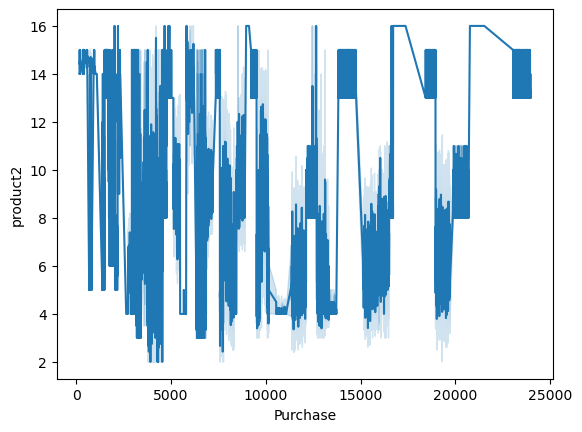

In [102]:
# Line Plot PURCHASE VS PRODUCT2
sns.lineplot(df1.Purchase , df1.product2)


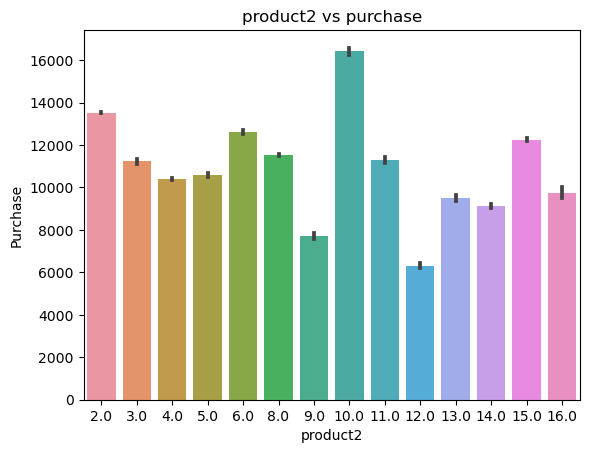

In [108]:
plt.title('product2 vs purchase')
sns.barplot(df1.product2,df1.Purchase)
plt.show()

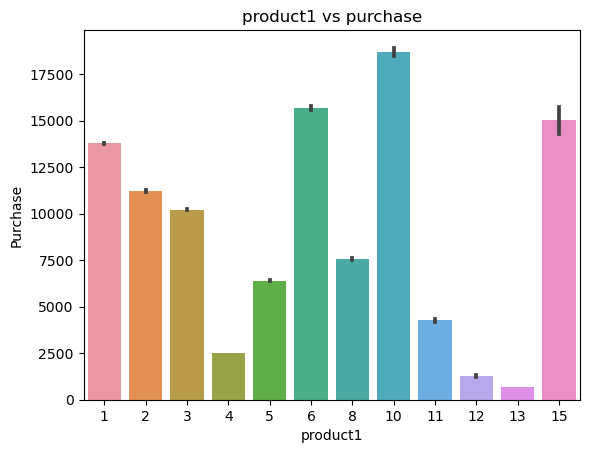

In [109]:
plt.title('product1 vs purchase')
sns.barplot(df1.product1,df1.Purchase)
plt.show()

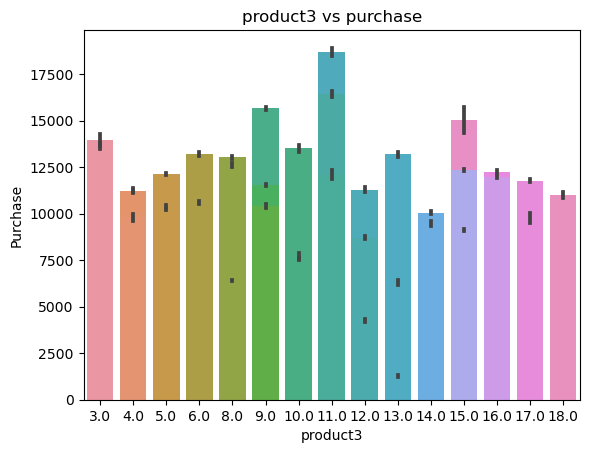

In [107]:
plt.title('product3 vs purchase')
sns.barplot(df1.product3,df1.Purchase)
plt.show()

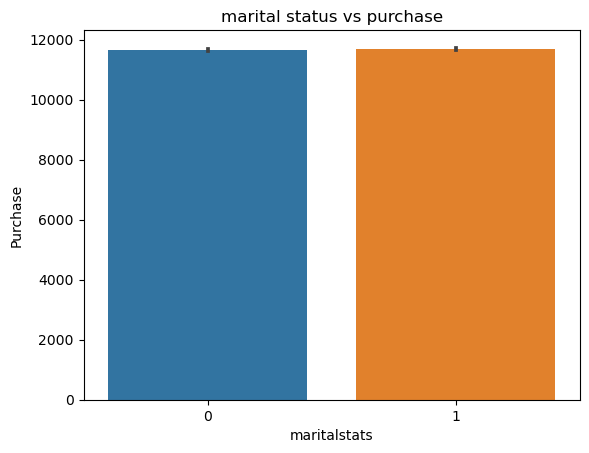

In [105]:
##MARITAL STATUS VS PURCHASE
plt.title('marital status vs purchase')
sns.barplot(df1.maritalstats, df1.Purchase)
plt.show()

# MULTIVARIATE ANALYSIS

<AxesSubplot:title={'center':'maritial vs purchase'}, xlabel='maritalstats', ylabel='Purchase'>

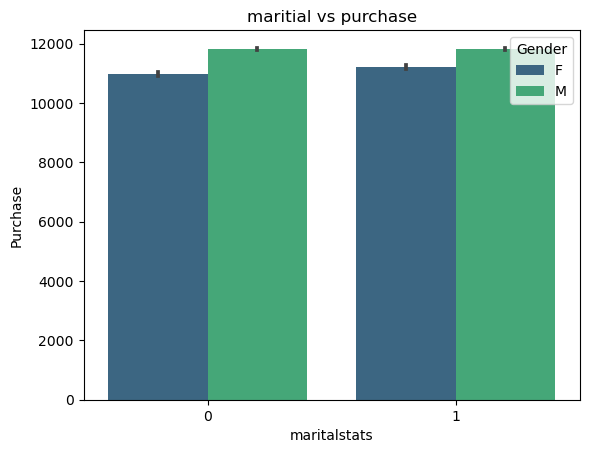

In [76]:
##MARITAL STATUS VS PURCHASE
plt.title('maritial vs purchase')
sns.barplot(df1.maritalstats ,df1.Purchase , hue = df1.Gender , palette = 'viridis')


<AxesSubplot:title={'center':'City vs Purchase'}, xlabel='City_Category', ylabel='Purchase'>

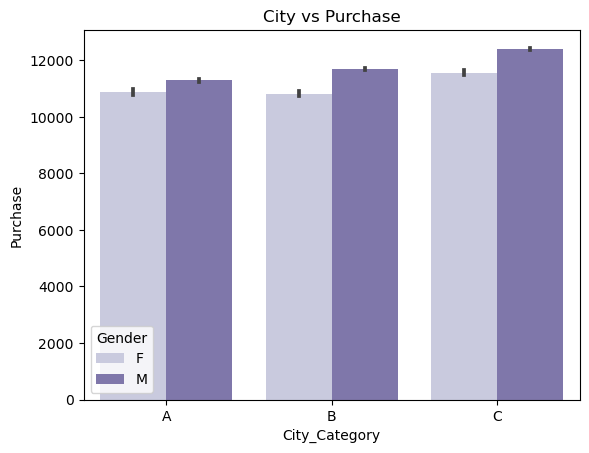

In [77]:
plt.title('City vs Purchase')
sns.barplot(df1.City_Category,df1.Purchase,hue=df1.Gender,palette='Purples')


<AxesSubplot:title={'center':'marital status vs purchase'}, xlabel='maritalstats', ylabel='Purchase'>

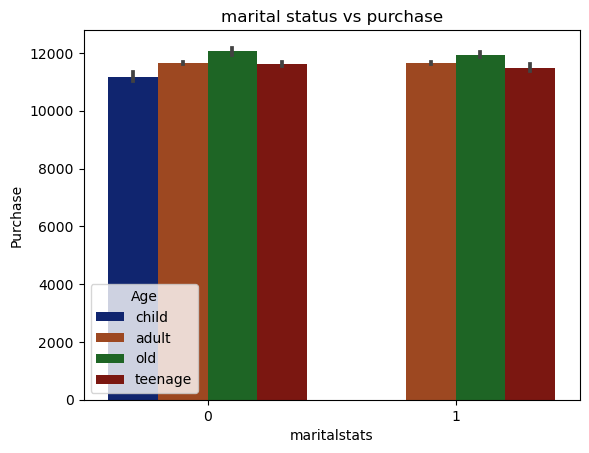

In [106]:
# Plotting purchase vs product1

plt.title('marital status vs purchase')
sns.barplot(df1.maritalstats , df1.Purchase,palette='dark',hue=df1.Age)